In [1]:
# Imports
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import genfromtxt

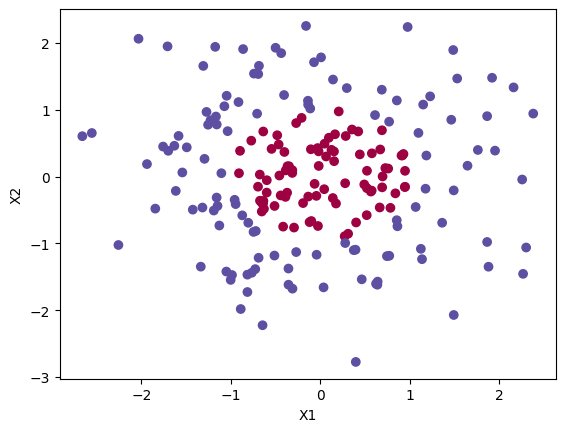

In [2]:
# Generate the dataset
# - 200 2D points (mean-0 nad SD=1) 
# - circle (R^2<1[0] and R^2>=1 [1])

np.random.seed(0)
X = np.random.randn(200, 2)
y = np.where(X[:, 0]**2 + X[:, 1]**2 > 1, 1, 0)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [3]:
class SimpleNN:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y):
        m = y.shape[0]
        
        # Compute gradients
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def compute_loss(self, y_pred, y):
        m = y.shape[0]
        loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
        return loss
    
    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)
            if i % 100 == 0:
                loss = self.compute_loss(y_pred, y)
                print(f'Epoch {i}, Loss: {loss}')

# One-hot encode the labels
y_one_hot = np.eye(2)[y]

# Create and train the neural network
nn = SimpleNN(input_dim=2, hidden_dim=3, output_dim=2, learning_rate=0.1)
nn.train(X, y_one_hot, epochs=1000)


Epoch 0, Loss: 1.4331306589752477
Epoch 100, Loss: 1.3786532771857827
Epoch 200, Loss: 1.3644379758694651
Epoch 300, Loss: 1.3567563152460167
Epoch 400, Loss: 1.3504706566322404
Epoch 500, Loss: 1.3432050050016358
Epoch 600, Loss: 1.3330573200337597
Epoch 700, Loss: 1.3181055506247368
Epoch 800, Loss: 1.2965778710255063
Epoch 900, Loss: 1.2674332801018524


In [13]:
# def plot_decision_boundary(nn, X, y):
#     # Create a mesh grid based on the feature ranges
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#     # Predict class probabilities for each point in the mesh grid
#     Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
    
#     # For binary classification, use argmax to get the class with the highest probability
#     Z = np.argmax(Z, axis=1)
    
#     # Reshape Z back to the shape of the mesh grid
#     Z = Z.reshape(xx.shape)

#     # Plotting
#     plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.title("Decision Boundary")
#     plt.show()

# # Assuming `nn` is an instance of the neural network class and `X`, `y` are your data and labels
# plot_decision_boundary(nn, X, y)


In [14]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
def has_vertical_line(image, threshold=0.5):
    # Check for vertical lines
    vertical_counts = np.sum(image > 0.5, axis=0)  # Count pixels > 0.5 in each column
    num_cols = image.shape[1]
    return np.any(vertical_counts / image.shape[0] > threshold)

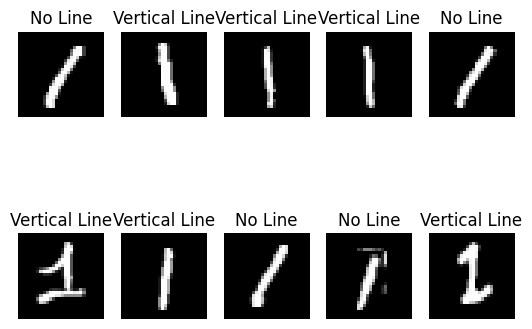

In [16]:
# Select 10 images of the digit '1'
indices = np.where(y_train == 1)[0][:10]
images = x_train[indices]

# Classify images
for i, image in enumerate(images):
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title("Vertical Line" if has_vertical_line(image) else "No Line")
    plt.axis('off')

plt.show()


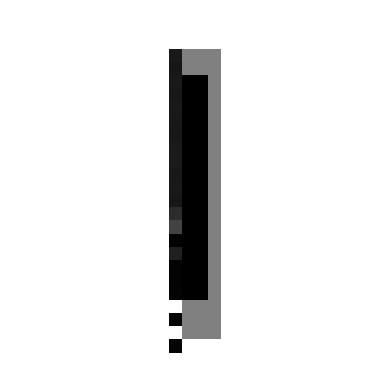

In [5]:
image1 = [[0] * 28 for _ in range(28)]
for i in range(5, 23):
    image1[i][14] = 1



with open("./assets/imageTwo.csv", 'r', encoding='utf-8-sig') as file:
    lines = file.readlines()

# Convert the lines into a list of lists containing numeric values
image_data = np.array([list(map(float, line.strip().split(','))) for line in lines])

# Display the binary image
plt.imshow(image_data, cmap='gray', interpolation='nearest')
plt.axis('off')  # Hide the axis
plt.show()
image1=(image_data)


kernel = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]



In [6]:
def convolve(image, kernel):
    # Get the dimensions of the image and the kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    # print("Image dimensions (height, width) => ", image_height, image_width)
    # print("Kernel dimensions (height, width) => ", kernel_height, kernel_width)
    
    # Calculate the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    print("Output dimensions (height, width) => ", output_height, output_width)
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # plt.figure(1)
    # plt.imshow(output, cmap='gray')
    # plt.title('Initial Output Image')
    # plt.show()
    
    # Perform the convolution
    
    for i in range(output_height):
        #print("Processing row i => ", i)
        for j in range(output_width):
            #print("  Processing column j => ", j)
            sum_value = 0
            for m in range(kernel_height):
                #print("    Kernel row m => ", m)
                for n in range(kernel_width):
                    #print("      Kernel column n => ", n)
                    sum_value += image[i + m][j + n] * kernel[m][n]
                    #print("      Updated sum_value => ", sum_value)
            output[i][j] = sum_value
            #print("  Updated output at position (i, j) => ", output[i][j])
            
            # # Plot the current output after each update
            # plt.figure(fig_num)
            # plt.imshow(output, cmap='gray')
            # plt.title(f'Convolution Step: i={i}, j={j}')
            # plt.show()
            # fig_num += 1
            
    # print("Final output image after convolution:")
    # for row in output:
    #     print(row)
    
    return output


Output dimensions (height, width) =>  26 26
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 230.0, 127.0, -103.0, 0.0, -127.0, -127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 463.0, 254.0, -209.0, 0.0, -254.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 509.0, -184.0, -128.0, -509.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 695.0, 637.0, -58.0, -256.0, -637.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 692.0, 765.0, 73.0, -384.0, -765.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 765.0, 72.0, -384.0, -765.0, -381.0, 0.0,

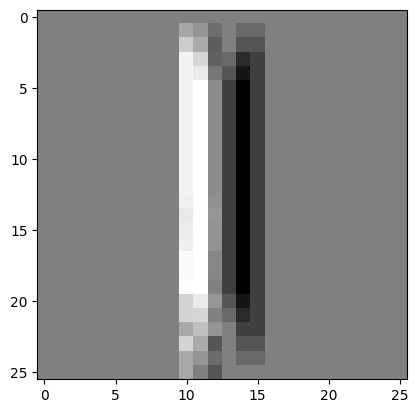

In [7]:
# Convolve the image with the kernel
output_image1 = convolve(image1, kernel)
plt.imshow(output_image1, cmap="gray")

# Print the convolved image (output)
for row in output_image1:
    print(row)


In [8]:
def max_pooling(image, pool_size=2):
    image_height, image_width = len(image), len(image[0])
    pool_height, pool_width = pool_size, pool_size
    
    # Calculate output dimensions
    output_height = image_height // pool_height
    output_width = image_width // pool_width
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            # Define the window
            window = [image[i * pool_height + m][j * pool_width + n] 
                      for m in range(pool_height) for n in range(pool_width)]
            # Find the maximum value in the window
            output[i][j] = max(window)
            
    return output


[0.0, 0.0, 0.0, 0.0, 0.0, 230.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 0.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 73.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 72.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 76.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 77.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 93.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 135.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 102.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 39.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 637.0, 134.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 500.0, 131.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 250.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


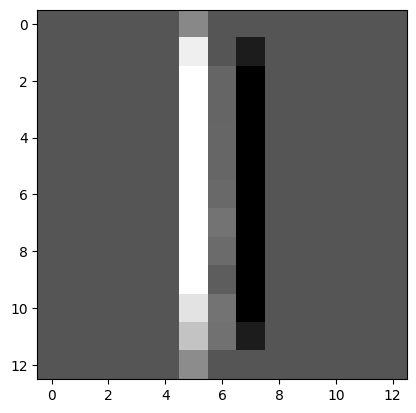

In [9]:
# Convolve the image with the kernel
pool_image1 = max_pooling(output_image1)
plt.imshow(pool_image1, cmap="gray")

# Print the convolved image (output)
for row in pool_image1:
    print(row)

In [10]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:

x = tf.concat([x_train, x_test], axis=0)
labels = tf.concat([y_train, y_test], axis=0)
image_data=x[labels==1][0]
print(image_data)

tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0

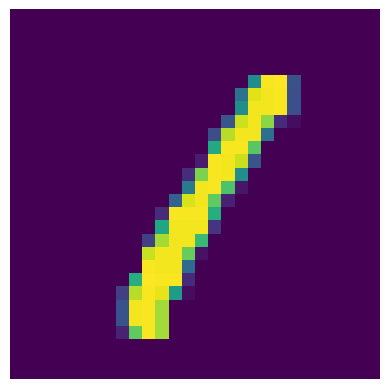

In [12]:
plt.imshow(image_data)
plt.axis('off')
plt.show()